In [1]:
## Import packages
%matplotlib inline
%xmode Verbose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.ticker as ticker
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize

pd.options.display.max_rows = 500

Exception reporting mode: Verbose


C:\Users\junta\Anaconda2\envs\py3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('final cleaned data file 022019.csv')
df = df.dropna()
df = df[~(df.ConvertedSalary>=250000)]

df

,FormalEducation,UndergradMajor,CompanySize,YearsCodingProf,JobSatisfaction,ConvertedSalary,HoursComputer,Gender,RaceEthnicity,Age,...,R,Salesforce,IBM Cloud or Watson,AWS,Azure,Google Cloud Platform/App Engine,TensorFlow,Torch/PyTorch,Spark,Hadoop
0,No Secondary Degree,Non STEM MAJOR,15.0,19,Slightly dissatisfied,75000.0,8.0,OTHER,White or of European descent,50.0,...,0,0,0,0,0,0,0,0,0,0
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",STEM MAJOR,60.0,7,Moderately satisfied,80000.0,8.0,Male,White or of European descent,30.0,...,0,0,0,0,0,0,0,0,0,0
2,POST Bachelor's,STEM MAJOR,20000.0,7,Moderately satisfied,120000.0,12.0,Male,White or of European descent,30.0,...,0,0,1,0,0,0,0,1,1,1
3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Non STEM MAJOR,3000.0,4,Moderately satisfied,70000.0,12.0,Male,White or of European descent,30.0,...,0,0,0,0,0,0,0,0,0,0
4,POST Bachelor's,Non STEM MAJOR,7500.0,1,Extremely satisfied,60000.0,8.0,Male,Black/African Descent,40.0,...,0,0,0,0,0,0,0,0,0,0
5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",STEM MAJOR,60.0,4,Moderately satisfied,60000.0,12.0,Male,East Asian,21.0,...,0,0,0,0,0,0,0,0,0,0
6,POST Bachelor's,STEM MAJOR,20000.0,7,Moderately dissatisfied,140000.0,12.0,Male,White or of European descent,30.0,...,0,0,0,1,1,0,0,0,0,0
7,"Bachelor’s degree (BA, BS, B.Eng., etc.)",STEM MAJOR,300.0,19,Moderately dissatisfied,185000.0,12.0,Male,White or of European descent,40.0,...,1,0,0,1,1,0,0,0,1,1
8,POST Bachelor's,Non STEM MAJOR,60.0,4,Slightly dissatisfied,125000.0,12.0,Male,East Asian,30.0,...,0,0,0,1,0,1,0,0,0,0
9,"Bachelor’s degree (BA, BS, B.Eng., etc.)",STEM MAJOR,5.0,4,Moderately satisfied,25000.0,12.0,Male,White or of European descent,30.0,...,0,0,0,0,0,0,0,0,0,0


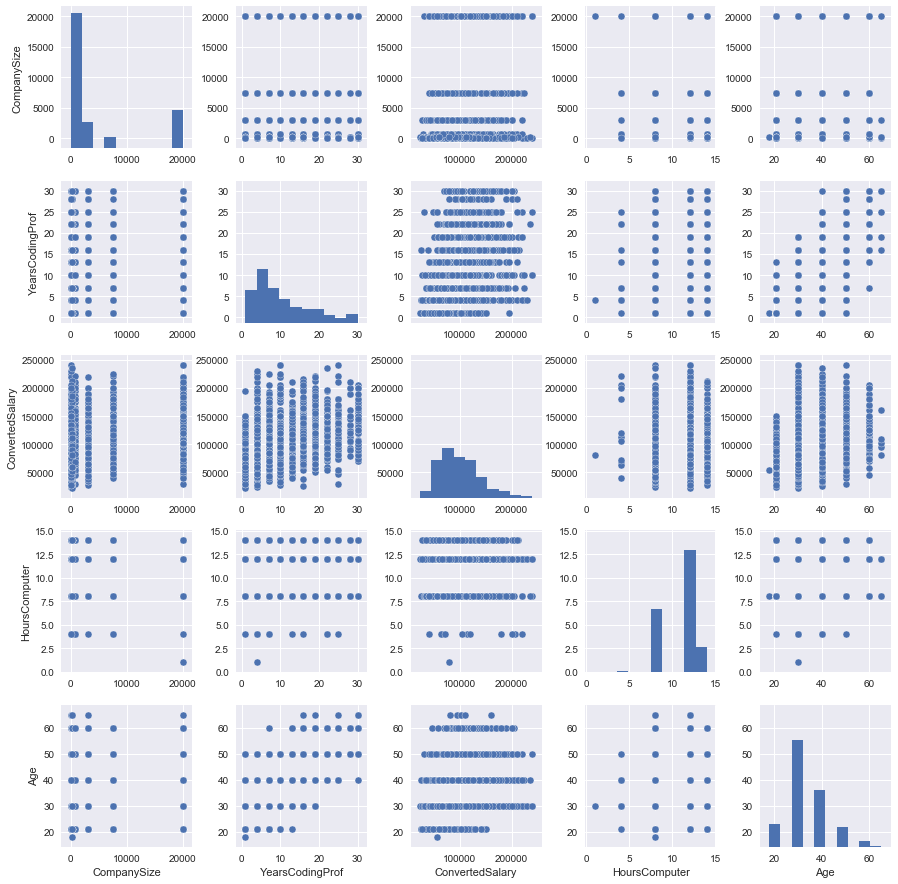

In [3]:
fig = sns.pairplot(df, vars=['CompanySize', 'YearsCodingProf', 'ConvertedSalary', 'HoursComputer', 'Age'])
fig.savefig('pair.png')

In [4]:
## Create dummy variables

df = pd.get_dummies(df, columns=['FormalEducation', 'UndergradMajor', 'Gender', 'RaceEthnicity'], drop_first=True)

In [5]:
df = df.drop(['JobSatisfaction'], axis=1)
df

,CompanySize,YearsCodingProf,ConvertedSalary,HoursComputer,Age,Python,Scala,Matlab,SQL,Julia,...,"FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)",FormalEducation_No Secondary Degree,FormalEducation_POST Bachelor's,UndergradMajor_STEM MAJOR,Gender_Male,Gender_OTHER,RaceEthnicity_East Asian,RaceEthnicity_Hispanic or Latino/Latina,RaceEthnicity_Other,RaceEthnicity_White or of European descent
0,15.0,19,75000.0,8.0,50.0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,60.0,7,80000.0,8.0,30.0,1,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
2,20000.0,7,120000.0,12.0,30.0,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,3000.0,4,70000.0,12.0,30.0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
4,7500.0,1,60000.0,8.0,40.0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
5,60.0,4,60000.0,12.0,21.0,1,0,0,1,0,...,1,0,0,1,1,0,1,0,0,0
6,20000.0,7,140000.0,12.0,30.0,1,0,0,1,0,...,0,0,1,1,1,0,0,0,0,1
7,300.0,19,185000.0,12.0,40.0,1,1,0,1,0,...,1,0,0,1,1,0,0,0,0,1
8,60.0,4,125000.0,12.0,30.0,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
9,5.0,4,25000.0,12.0,30.0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1


In [6]:
df = df.astype('float64')
df.dtypes
## Numerical variables: CompanySize, YearsCodingProf, HoursComputer, Age
## Response variable: ConvertedSalary

CompanySize                                                 float64
YearsCodingProf                                             float64
ConvertedSalary                                             float64
HoursComputer                                               float64
Age                                                         float64
Python                                                      float64
Scala                                                       float64
Matlab                                                      float64
SQL                                                         float64
Julia                                                       float64
Java                                                        float64
R                                                           float64
Salesforce                                                  float64
IBM Cloud or Watson                                         float64
AWS                                             

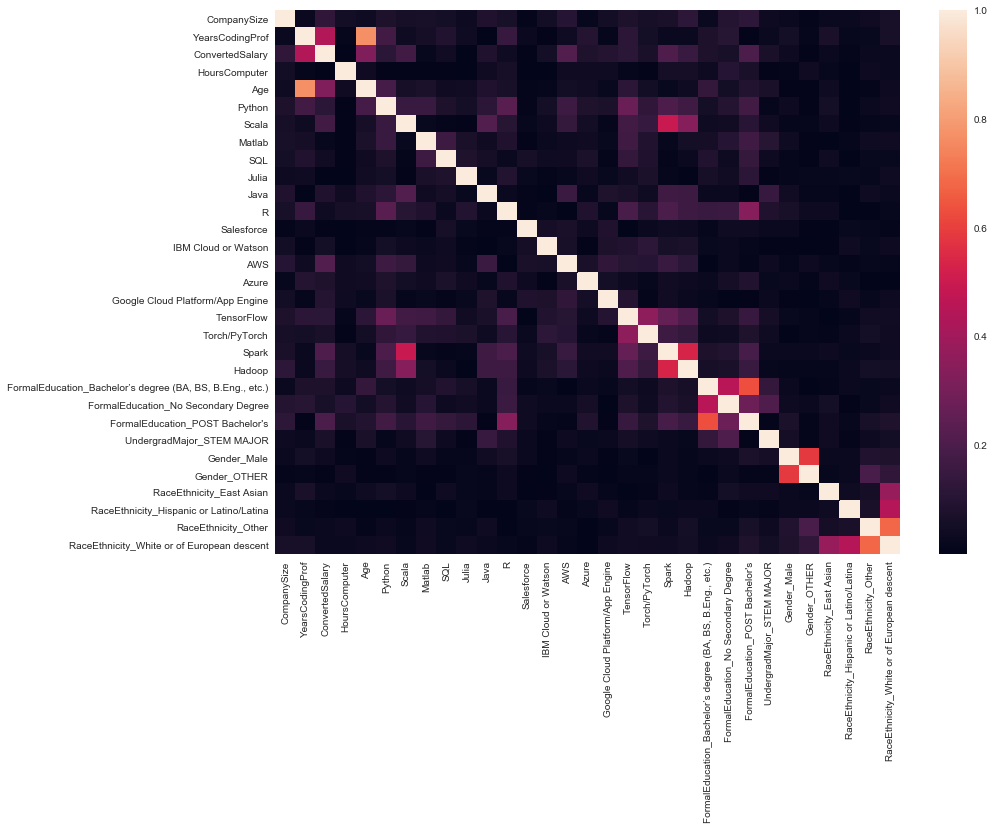

In [7]:
# Corresponding coefficient heatmap
# find the pairwise correlation of all columns in the dataframe

corr = df.corr()
fig2, ax = plt.subplots()
fig2.set_size_inches(14, 10)
sns.heatmap(abs(corr), xticklabels=corr.columns, yticklabels=corr.columns)

In [8]:
X1 = df.loc[:, ['CompanySize', 'YearsCodingProf', 'HoursComputer', 'Age']] 
X2 = df.iloc[:, 5:]
y = df.loc[:, 'ConvertedSalary']
X1

,CompanySize,YearsCodingProf,HoursComputer,Age
0,15.0,19.0,8.0,50.0
1,60.0,7.0,8.0,30.0
2,20000.0,7.0,12.0,30.0
3,3000.0,4.0,12.0,30.0
4,7500.0,1.0,8.0,40.0
5,60.0,4.0,12.0,21.0
6,20000.0,7.0,12.0,30.0
7,300.0,19.0,12.0,40.0
8,60.0,4.0,12.0,30.0
9,5.0,4.0,12.0,30.0


In [13]:
## Normalization
X1_scaled = (X1-X1.min())/(X1.max()-X1.min())
X = pd.concat([X1_scaled, X2], axis=1)


,CompanySize,YearsCodingProf,HoursComputer,Age,Python,Scala,Matlab,SQL,Julia,Java,...,"FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)",FormalEducation_No Secondary Degree,FormalEducation_POST Bachelor's,UndergradMajor_STEM MAJOR,Gender_Male,Gender_OTHER,RaceEthnicity_East Asian,RaceEthnicity_Hispanic or Latino/Latina,RaceEthnicity_Other,RaceEthnicity_White or of European descent
0,0.000500,0.620690,0.538462,0.680851,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.002751,0.206897,0.538462,0.255319,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.206897,0.846154,0.255319,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.149787,0.103448,0.846154,0.255319,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.374844,0.000000,0.538462,0.468085,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.002751,0.103448,0.846154,0.063830,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6,1.000000,0.206897,0.846154,0.255319,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,0.014754,0.620690,0.846154,0.468085,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.002751,0.103448,0.846154,0.255319,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,0.000000,0.103448,0.846154,0.255319,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [10]:
X.columns

Index(['CompanySize', 'YearsCodingProf', 'HoursComputer', 'Age', 'Python',
       'Scala', 'Matlab', 'SQL', 'Julia', 'Java', 'R', 'Salesforce',
       'IBM Cloud or Watson', 'AWS', 'Azure',
       'Google Cloud Platform/App Engine', 'TensorFlow', 'Torch/PyTorch',
       'Spark', 'Hadoop',
       'FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'FormalEducation_No Secondary Degree',
       'FormalEducation_POST Bachelor's', 'UndergradMajor_STEM MAJOR',
       'Gender_Male', 'Gender_OTHER', 'RaceEthnicity_East Asian',
       'RaceEthnicity_Hispanic or Latino/Latina', 'RaceEthnicity_Other',
       'RaceEthnicity_White or of European descent'],
      dtype='object')

C:\Users\junta\Anaconda2\envs\py3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training score:  0.3527092583414778
Testing score:  0.3170121761191954
MSE: 971282777.6572126


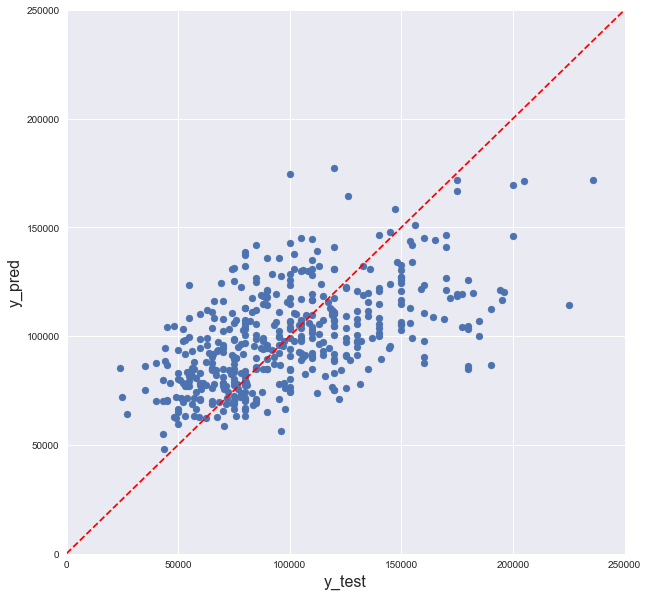

In [11]:
## Multiple linear regression

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

fig3, ax = plt.subplots()
fig3.set_size_inches(10, 10)
ax.set_xlim(0, 250000)
ax.set_ylim(0, 250000)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test',fontsize = 16)
plt.ylabel('y_pred',fontsize = 16)
ax
ab = np.linspace(0, 250000, 1000)
plt.plot(ab, ab, linestyle='dashed', color='red')
print('Training score: ', lm.score(X_train,y_train))
print('Testing score: ', lm.score(X_test,y_test))
print('MSE:', mean_squared_error(y_test, y_pred))  

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

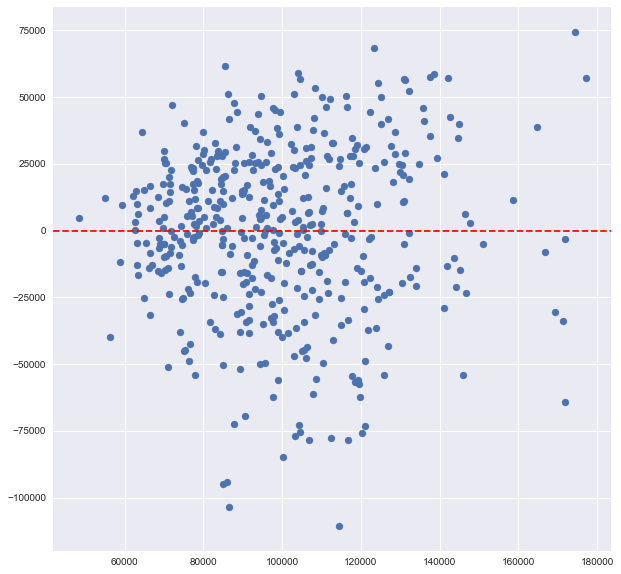

In [12]:
fig3, ax = plt.subplots()
fig3.set_size_inches(10, 10)
plt.scatter(y_pred, (y_pred-y_test))
plt.axhline(y=0, color='r', linestyle='--')
fig.set_size_inches(10, 10)

plt.xlabel('y_pred', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
pd.Series([variance_inflation_factor(X_14.values, i) 
               for i in range(X_14.shape[1])], 
              index=X_14.columns)

NameError: name 'X_14' is not defined

In [ ]:
## Linear regression with cross validation

from sklearn.model_selection import KFold
k_fold = KFold(5)
for train, test in k_fold.split(X, y):
    #lm = LinearRegression()
    lm.fit(X.iloc[train], y.iloc[train])
    y_pred = lm.predict(X.iloc[test])
    plt.scatter(y.iloc[test], y_pred)
plt.plot(ab, ab, linestyle='dashed', color='red')

In [ ]:
## Rige Coefficients

#import glmnet as gln

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_14), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('lambda', fontsize=13)
plt.ylabel('weights', fontsize=13)
plt.title('Ridge coefficients as a function of the regularization');

In [16]:
import itertools
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

k = 30

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

## Forward stepwise selection
## AIC, BIC, Mallows'CP

df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index
#Initializing useful variables
m = len(y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[YearsCodingProf],2.687943e+12,0.191847,1,1.169496e+09,1.232969,1.235465,0.191496
2,"[YearsCodingProf, Spark]",2.533014e+12,0.238428,2,1.102960e+09,1.162822,1.167814,0.237765
3,"[YearsCodingProf, Spark, AWS]",2.439772e+12,0.266462,3,1.063245e+09,1.120951,1.128439,0.265503
4,"[YearsCodingProf, Spark, AWS, FormalEducation_...",2.344613e+12,0.295072,4,1.022696e+09,1.078202,1.088186,0.293844
5,"[YearsCodingProf, Spark, AWS, FormalEducation_...",2.308598e+12,0.305901,5,1.007862e+09,1.062563,1.075043,0.304388
6,"[YearsCodingProf, Spark, AWS, FormalEducation_...",2.278040e+12,0.315088,6,9.954008e+08,1.049425,1.064401,0.313296
7,"[YearsCodingProf, Spark, AWS, FormalEducation_...",2.251056e+12,0.323201,7,9.844936e+08,1.037926,1.055397,0.321134
8,"[YearsCodingProf, Spark, AWS, FormalEducation_...",2.233557e+12,0.328462,8,9.777103e+08,1.030774,1.050742,0.326117
9,"[YearsCodingProf, Spark, AWS, FormalEducation_...",2.216545e+12,0.333577,9,9.711385e+08,1.023846,1.046309,0.330958
10,"[YearsCodingProf, Spark, AWS, FormalEducation_...",2.205292e+12,0.336960,10,9.670705e+08,1.019557,1.044517,0.334064


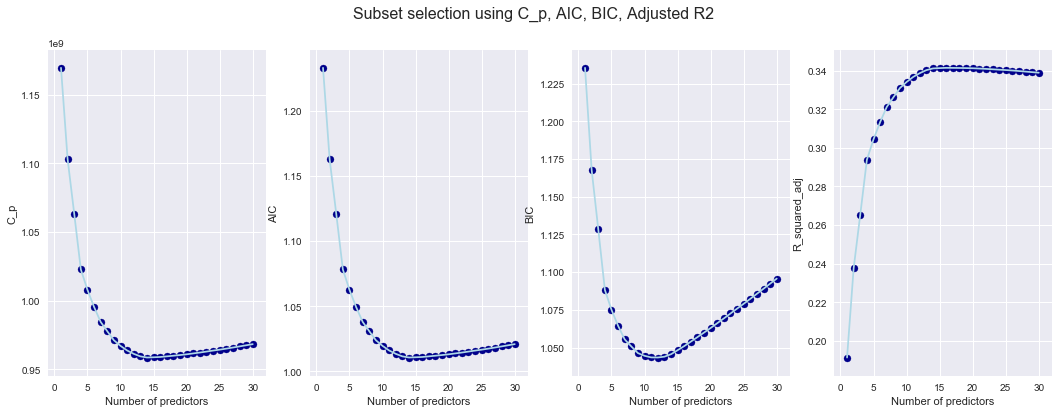

In [17]:
## Plotting the computed values as a function of number of features

variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

Selected features:  ['YearsCodingProf', 'Spark', 'AWS', "FormalEducation_POST Bachelor's", 'CompanySize', 'Python', 'FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Scala', 'Google Cloud Platform/App Engine', 'SQL', 'Azure', 'FormalEducation_No Secondary Degree', 'TensorFlow', 'RaceEthnicity_East Asian', 'UndergradMajor_STEM MAJOR']
Training score:  0.34897823595764854
MSE: 955055604.5877495


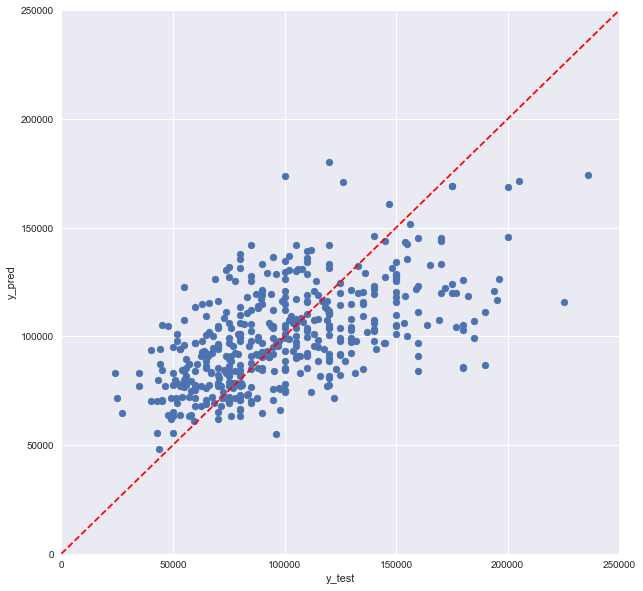

In [18]:
## Linear regression using the selected 14 features 

v14 = df1.iloc[14,0]
X_14 = X[v14]
X_train, X_test, y_train, y_test = train_test_split(X_14, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

fig3, ax = plt.subplots()
fig3.set_size_inches(10, 10)
ax.set_xlim(0, 250000)
ax.set_ylim(0, 250000)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

ab = np.linspace(0, 250000, 1000)
plt.plot(ab, ab, linestyle='dashed', color='red')
print('Selected features: ', v14)
print('Training score: ', lm.score(X_train,y_train))
##print('Testing score: ', lm.score(X_test,y_test))
print('MSE:', mean_squared_error(y_test, y_pred))  

In [21]:
testing = X_14.iloc[0:5]
y_pred = lm.predict(testing)
y_pred

array([ 97925.25018351,  84361.0029903 , 133293.93055672,  77310.41473877,
        82313.26192596])

In [22]:
lm.coef_

array([66776.97003941, 12641.25227263, 13342.42087955, 26545.66713982,
        8161.53362246,  5663.24516837, 16471.66180088, 12557.52155225,
        9866.97579083, -5521.06461006,  5982.20197777,  9428.34382117,
        6109.16668855,  8174.75598992,  1342.67128753])

In [26]:
lm.intercept_

52566.11467791945

In [23]:
y.iloc[0:5]

0     75000.0
1     80000.0
2    120000.0
3     70000.0
4     60000.0
Name: ConvertedSalary, dtype: float64

In [24]:
X_train.to_csv('training.csv')


In [25]:
y_train.to_csv('training_y.csv')

In [ ]:
## Ridge regression with all variables
## Ridge alpha = 10

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rr10 = Ridge(alpha=10)
rr10.fit(X_train, y_train)
y_pred = rr10.predict(X_test)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_xlim(0, 250000)
ax.set_ylim(0, 250000)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

ab = np.linspace(0, 250000, 1000)
plt.plot(ab, ab, linestyle='dashed', color='red')
print('Training score: ', rr10.score(X_train,y_train))
print('Testing score: ', rr10.score(X_test,y_test))
print('MSE:', mean_squared_error(y_test, y_pred))  

In [ ]:
## Ridge regression with selected 14 variables
## Rigde alpha = 100

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_14, y, test_size=0.2, random_state=0)
rr10 = Ridge(alpha=100)
rr10.fit(X_train, y_train)
y_pred = rr10.predict(X_test)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_xlim(0, 250000)
ax.set_ylim(0, 250000)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)

ab = np.linspace(0, 250000, 1000)
plt.plot(ab, ab, linestyle='dashed', color='red')
print('Training score: ', rr10.score(X_train,y_train))
print('Testing score: ', rr10.score(X_test,y_test))
print('MSE:', mean_squared_error(y_test, y_pred))  

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.scatter(y_pred, (y_pred-y_test))
plt.axhline(y=0, color='r', linestyle='--')
fig.set_size_inches(10, 10)

plt.xlabel('y_pred', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)

In [ ]:
## Ridge regression with all variables
## Rigde alpha = 100

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rr10 = Ridge(alpha=10)
rr10.fit(X_train, y_train)
y_pred = rr10.predict(X_test)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_xlim(0, 250000)
ax.set_ylim(0, 250000)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

ab = np.linspace(0, 250000, 1000)
plt.plot(ab, ab, linestyle='dashed', color='red')
print('Training score: ', rr10.score(X_train,y_train))
print('Testing score: ', rr10.score(X_test,y_test))
print('MSE:', mean_squared_error(y_test, y_pred))  

In [ ]:
## Polynomial regression with all variables

from sklearn.preprocessing import PolynomialFeatures 

X_train, X_test, y_train, y_test = train_test_split(X_14, y, test_size=0.2, random_state=0)
poly = PolynomialFeatures(degree = 2)
X_train_ = poly.fit_transform(X_train) 
X_test_ = poly.fit_transform(X_test)
#poly.fit(X_train_, y) 

# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_train_, y_train)

# Obtain coefficients
#lg.coef_
y_pred = lg.predict(X_test_)

fig4, ax = plt.subplots()
fig4.set_size_inches(10, 10)
#ax.set_xlim(0, 250000)
#ax.set_ylim(0, 250000)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
ab = np.linspace(0, 250000, 1000)
plt.plot(ab, ab, linestyle='dashed', color='red')
print('Training score: ', lg.score(X_train_,y_train))
print('Testing score: ', lg.score(X_test_,y_test))
print('MSE:', mean_squared_error(y_test, y_pred)) 
mse = sum(np.square(y_pred-y_test))/len(y_pred)
np.square(y_pred-y_test)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.scatter(y_pred, (y_pred-y_test))
plt.axhline(y=0, color='r', linestyle='--')
fig.set_size_inches(10, 10)

plt.xlabel('y_pred', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)